In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from scipy import integrate
from tqdm import tqdm
import random
%matplotlib ipympl

In [2]:
D = 0.01
a = 0.2
b = 0.3
e = 0.03

Nt = 1000
Nx = 50
t = np.linspace(0,10,Nt)
x = np.linspace(0,1,Nx)

dx = x[1] - x[0]
dt = t[1] - t[0]

def ui(x):    
    return np.random.uniform(0,0.3,len(x))

def ui0(x):
    return 0.1
def uif(x):
    return 0.2


def InitT():
    
    u = np.zeros((Nt,Nx))
    w = np.zeros((Nt,Nx))
    u[0,:] = ui(x)
    u[:,0] = ui0(t)
    u[:,-1] = uif(t)
    
    
    
    return u,w


u,w = InitT()
h = np.random.uniform(0,0.3,len(x))
h

array([0.29124139, 0.03282438, 0.0957699 , 0.09338489, 0.03419856,
       0.00082662, 0.18586852, 0.10722553, 0.082202  , 0.23884893,
       0.05982665, 0.18035171, 0.24476788, 0.0215655 , 0.09412329,
       0.0727903 , 0.08650668, 0.09650527, 0.12030677, 0.28200132,
       0.13789636, 0.16090148, 0.19787584, 0.03840056, 0.11133786,
       0.10642422, 0.04324984, 0.10639136, 0.29281967, 0.25860669,
       0.16682258, 0.26585339, 0.28497663, 0.23666419, 0.19118377,
       0.19997421, 0.24234139, 0.22799338, 0.12584678, 0.19040379,
       0.03141338, 0.15934534, 0.25718328, 0.23308836, 0.03862099,
       0.07409117, 0.06005294, 0.09756132, 0.09274069, 0.26618524])

In [3]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            
            u[l,i] = dt*((D/(dx**2))*(u[l-1,i+1]-2*u[l-1,i]+u[l-1,i-1]) - u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i]) + w[l-1,i]) + u[l-1,i]
            w[l,i] = w[l-1,i] + dt*e*(u[l-1,i] - b*w[l-1,i])

In [4]:
GetSolution()

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:00<00:00, 1314.59it/s]


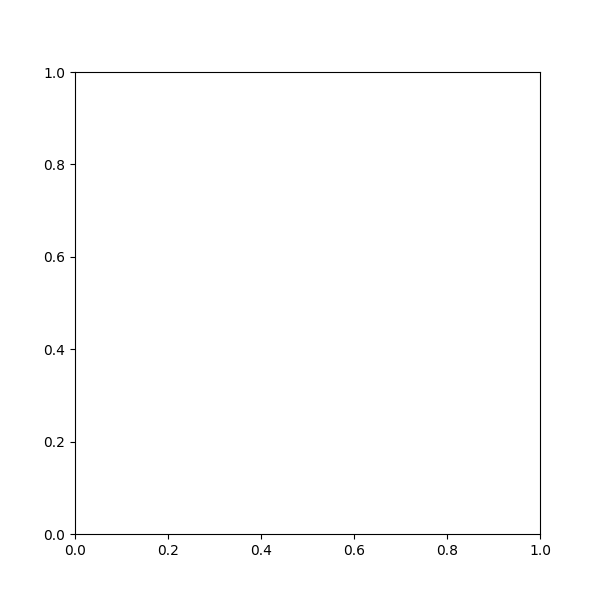

In [5]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.4)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$Voltaje$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.plot(x,w[i,:],'--' ,color='green', label=r'$w(x,%.2f)$' %(t[i]))
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [6]:
tiempo = 0
pos = 0
for i in range(len(t)):
    val = max(u[i,:])
    if val > 0.3:
        tiempo = t[i]
        j = np.where(u[i,:] == val)
        pos = x[j]
        break
print("el tiempo es:", tiempo)
print("la posicion es:", pos)

el tiempo es: 7.957957957957958
la posicion es: [0.6122449]
